# UE19CS345 – NETWORK ANALYSIS AND MINING 
# Lab Evaluation 01 

__(a) Make a list of characters in your novel.__

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))
import community.community_louvain
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import k_clique_communities
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

/Users/Ishita/opt/anaconda3/bin/python
3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)
NetworkX version: 2.7.1


In [2]:
nltk.download('gutenberg')
nltk.download('stopwords')
from nltk.corpus import gutenberg
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/Ishita/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Ishita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
pnp = open("../Shared Code/NAM-main/PrideAndPrejudice.txt", "r", encoding='utf-8')
#pnp = open("PrideAndPrejudice.txt", "r", encoding='utf-8')
pnp = pnp.read()

In [5]:
characters = ['Elizabeth', 'Darcy', 'Mr._Bennet', 'Mrs._Bennet', 'Jane', 'Mary', \
              'Kitty', 'Lydia', 'Mr._Bingley', 'Caroline', 'Mr._Wickham', \
              'William', 'Catherine', 'Mr._Gardiner','Mrs._Gardiner', 'Georgiana', \
              'Charlotte', 'Fitzwilliam','Phillips']

In [6]:
print(len(characters))

19


**(b) Extract a social graph of the manually identified characters in the text**

In [7]:
pnp = pnp.replace('Mr. Bennet', 'Mr._Bennet')
pnp = pnp.replace('Mrs. Bennet', 'Mrs._Bennet')
pnp = pnp.replace('Mr. Bingley', 'Mr._Bingley')
pnp = pnp.replace('Mr. Wickham', 'Mr._Wickham')
pnp = pnp.replace('Mr. Gardiner', 'Mr._Gardiner')
pnp = pnp.replace('Mrs. Gardiner', 'Mrs._Gardiner')

In [8]:
sentences = sent_tokenize(pnp)
print(len(sentences))

4770


In [9]:
count = 0
chapters = []
for sent in sentences:
    if ("Chapter" in sent and sent[0] == 'C') or "Epilogue" in sent or "CHAPTER 42" in sent:
        sentences.remove(sent)
        count+=1
    elif 'Jane Austen' in sent:
        sentences.remove(sent)
    elif 'Pride-And-Prejudice' in sent:
        sent.replace('Pride-And-Prejudice','Pride And Prejudice')

print(len(sentences))

4718


In [10]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Elizabeth,Darcy,Mr._Bennet,Mrs._Bennet,Jane,Mary,Kitty,Lydia,Mr._Bingley,Caroline,Mr._Wickham,William,Catherine,Mr._Gardiner,Mrs._Gardiner,Georgiana,Charlotte,Fitzwilliam,Phillips
Elizabeth,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Darcy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mr._Bennet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mrs._Bennet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jane,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
print(sentences[1])

If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.


In [12]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2):
                if char1 in sentence and char2 in sentence:
                    char_df[char1][char2] += 1
                    char_df[char2][char1] += 1

char_df.head()

,Elizabeth,Darcy,Mr._Bennet,Mrs._Bennet,Jane,Mary,Kitty,Lydia,Mr._Bingley,Caroline,Mr._Wickham,William,Catherine,Mr._Gardiner,Mrs._Gardiner,Georgiana,Charlotte,Fitzwilliam,Phillips
Elizabeth,0,162,12,30,154,16,24,48,42,2,30,16,46,12,30,8,44,12,2
Darcy,162,0,4,6,36,0,6,10,28,6,16,8,16,0,6,10,6,26,2
Mr._Bennet,12,4,0,10,6,4,0,14,10,0,2,2,6,6,2,0,6,0,0
Mrs._Bennet,30,6,10,0,26,6,14,18,14,0,0,8,8,0,0,0,6,0,4
Jane,154,36,6,26,0,2,6,24,26,6,8,4,4,4,6,0,8,2,2


In [13]:
char_df['Mrs._Gardiner']

Elizabeth        30
Darcy             6
Mr._Bennet        2
Mrs._Bennet       0
Jane              6
Mary              0
Kitty             0
Lydia             2
Mr._Bingley       0
Caroline          0
Mr._Wickham       2
William           0
Catherine         0
Mr._Gardiner      0
Mrs._Gardiner     0
Georgiana         0
Charlotte         0
Fitzwilliam       0
Phillips          2
Name: Mrs._Gardiner, dtype: int64

In [14]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [15]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 19
Nodes: ['Elizabeth', 'Darcy', 'Mr._Bennet', 'Mrs._Bennet', 'Jane', 'Mary', 'Kitty', 'Lydia', 'Mr._Bingley', 'Caroline', 'Mr._Wickham', 'William', 'Catherine', 'Mr._Gardiner', 'Mrs._Gardiner', 'Georgiana', 'Charlotte', 'Fitzwilliam', 'Phillips']

Number of edges in the graph: 100
Edges: [('Elizabeth', 'Darcy', {'weight': 162}), ('Elizabeth', 'Mr._Bennet', {'weight': 12}), ('Elizabeth', 'Mrs._Bennet', {'weight': 30}), ('Elizabeth', 'Jane', {'weight': 154}), ('Elizabeth', 'Mary', {'weight': 16}), ('Elizabeth', 'Kitty', {'weight': 24}), ('Elizabeth', 'Lydia', {'weight': 48}), ('Elizabeth', 'Mr._Bingley', {'weight': 42}), ('Elizabeth', 'Caroline', {'weight': 2}), ('Elizabeth', 'Mr._Wickham', {'weight': 30}), ('Elizabeth', 'William', {'weight': 16}), ('Elizabeth', 'Catherine', {'weight': 46}), ('Elizabeth', 'Mr._Gardiner', {'weight': 12}), ('Elizabeth', 'Mrs._Gardiner', {'weight': 30}), ('Elizabeth', 'Georgiana', {'weight': 8}), ('Elizabeth', 'Charlotte', {'w

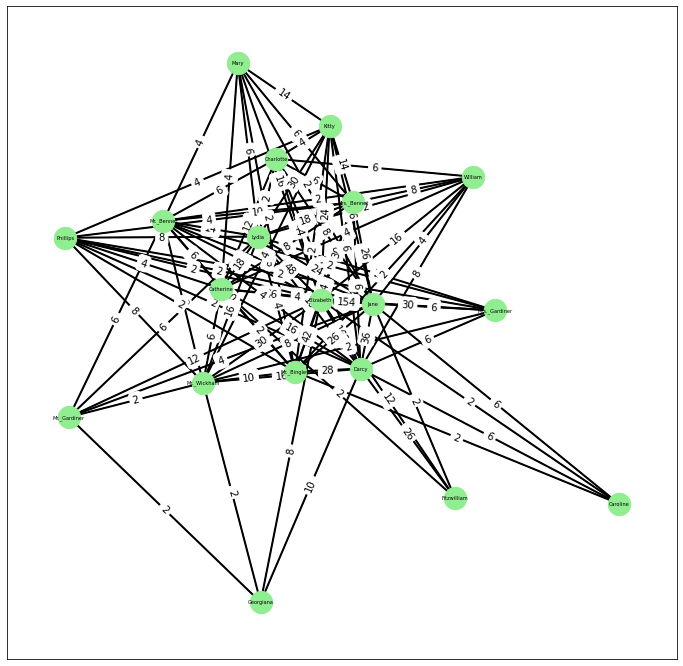

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 500, font_size=5, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos,width=2,edge_cmap=plt.cm.Blues)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plot = plt.show()
#plot.savefig("graph.pdf")
plt.savefig("sgraph.pdf")

**(c) Calculate the four types of centrality of main protagonists (i.e. degree, betweenness, closeness, PageRank)**

In [17]:
list(G.edges(data=True))

[('Elizabeth', 'Darcy', {'weight': 162}),
 ('Elizabeth', 'Mr._Bennet', {'weight': 12}),
 ('Elizabeth', 'Mrs._Bennet', {'weight': 30}),
 ('Elizabeth', 'Jane', {'weight': 154}),
 ('Elizabeth', 'Mary', {'weight': 16}),
 ('Elizabeth', 'Kitty', {'weight': 24}),
 ('Elizabeth', 'Lydia', {'weight': 48}),
 ('Elizabeth', 'Mr._Bingley', {'weight': 42}),
 ('Elizabeth', 'Caroline', {'weight': 2}),
 ('Elizabeth', 'Mr._Wickham', {'weight': 30}),
 ('Elizabeth', 'William', {'weight': 16}),
 ('Elizabeth', 'Catherine', {'weight': 46}),
 ('Elizabeth', 'Mr._Gardiner', {'weight': 12}),
 ('Elizabeth', 'Mrs._Gardiner', {'weight': 30}),
 ('Elizabeth', 'Georgiana', {'weight': 8}),
 ('Elizabeth', 'Charlotte', {'weight': 44}),
 ('Elizabeth', 'Fitzwilliam', {'weight': 12}),
 ('Elizabeth', 'Phillips', {'weight': 2}),
 ('Darcy', 'Mr._Bennet', {'weight': 4}),
 ('Darcy', 'Mrs._Bennet', {'weight': 6}),
 ('Darcy', 'Jane', {'weight': 36}),
 ('Darcy', 'Kitty', {'weight': 6}),
 ('Darcy', 'Lydia', {'weight': 10}),
 ('Darcy'

In [18]:
s='\n The graph details: '
print (s)


a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)

a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)

a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)

deg=nx.degree(G)
a= min(deg)
s='\n The min degree: ' +repr(a)
print (s)

a = max(deg)
s='\n The max degree: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)



 The graph details: 

 The no of nodes: 19

 The no of edges: 100

 The min degree: ('Caroline', 4)

 The max degree: ('William', 9)

 The no of edges: 100


<u> Degree Centrality and scores: </u>

In [19]:
from operator import itemgetter
degc = nx.degree_centrality(G)
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Elizabeth', 1.0),
 ('Jane', 0.9444444444444444),
 ('Darcy', 0.8888888888888888),
 ('Lydia', 0.8333333333333333),
 ('Mr._Bennet', 0.7222222222222222),
 ('Mr._Bingley', 0.7222222222222222),
 ('Catherine', 0.7222222222222222),
 ('Mrs._Bennet', 0.6666666666666666),
 ('Mr._Wickham', 0.6666666666666666),
 ('Kitty', 0.5555555555555556),
 ('Phillips', 0.5555555555555556),
 ('William', 0.5),
 ('Charlotte', 0.5),
 ('Mary', 0.4444444444444444),
 ('Mrs._Gardiner', 0.38888888888888884),
 ('Mr._Gardiner', 0.3333333333333333),
 ('Caroline', 0.2222222222222222),
 ('Georgiana', 0.2222222222222222),
 ('Fitzwilliam', 0.2222222222222222)]

<u> Betweenness Centrality and scores </u>

In [20]:
bet = nx.betweenness_centrality(G)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Elizabeth', 0.12248936611681711),
 ('Darcy', 0.08405954974582426),
 ('Jane', 0.0838183421516755),
 ('Lydia', 0.03588805892727462),
 ('Mr._Wickham', 0.029136839921153648),
 ('Catherine', 0.02571584189231248),
 ('Mr._Bennet', 0.025689905591866374),
 ('Mr._Bingley', 0.024502023031434794),
 ('Mrs._Bennet', 0.009251478369125429),
 ('Kitty', 0.006937960369332918),
 ('Phillips', 0.005425874053325033),
 ('Mr._Gardiner', 0.004901960784313725),
 ('Charlotte', 0.0023135179997925094),
 ('Mary', 0.0013798111837327522),
 ('Georgiana', 0.0010893246187363833),
 ('William', 0.0007262164124909223),
 ('Mrs._Gardiner', 0.0007262164124909223),
 ('Caroline', 0.0),
 ('Fitzwilliam', 0.0)]

<u> Closeness Centrality and scores </u>

In [21]:
clos = nx.closeness_centrality(G)
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('Elizabeth', 1.0),
 ('Jane', 0.9473684210526315),
 ('Darcy', 0.9),
 ('Lydia', 0.8571428571428571),
 ('Mr._Bennet', 0.782608695652174),
 ('Mr._Bingley', 0.782608695652174),
 ('Catherine', 0.782608695652174),
 ('Mrs._Bennet', 0.75),
 ('Mr._Wickham', 0.75),
 ('Kitty', 0.6923076923076923),
 ('Phillips', 0.6923076923076923),
 ('William', 0.6666666666666666),
 ('Charlotte', 0.6666666666666666),
 ('Mary', 0.6428571428571429),
 ('Mrs._Gardiner', 0.6206896551724138),
 ('Mr._Gardiner', 0.6),
 ('Caroline', 0.5625),
 ('Georgiana', 0.5625),
 ('Fitzwilliam', 0.5625)]

<u> PageRank Centrality </u>

In [22]:
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))


 sorted pagerank:



AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

<u> Comparing Centrality Measures </u>

In [23]:
import pandas as pd
import seaborn as sns
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'pagerank': pgr,
}
centrality = pd.DataFrame(centrality_measures)
centrality

NameError: name 'pgr' is not defined

In [24]:
sns.pairplot(centrality)

NameError: name 'centrality' is not defined

**(d) Calculate the global clustering coefficient of your graph and local clustering coefficient of the main protagonist nodes.**

In [25]:
largest = max(nx.connected_components(G), key=len)
len(largest)

19

In [26]:
cliques = list(nx.find_cliques(G))
[clique for clique in cliques if len(clique) > 2]

[['Elizabeth',
  'Jane',
  'Lydia',
  'Kitty',
  'Mr._Wickham',
  'Phillips',
  'Darcy',
  'Mr._Bingley'],
 ['Elizabeth', 'Jane', 'Lydia', 'Kitty', 'Mrs._Bennet', 'Charlotte', 'Darcy'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Kitty',
  'Mrs._Bennet',
  'Mr._Bingley',
  'Phillips',
  'Darcy'],
 ['Elizabeth', 'Jane', 'Lydia', 'Kitty', 'Mrs._Bennet', 'Mr._Bingley', 'Mary'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Mrs._Gardiner',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Catherine',
  'Mr._Bingley',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Catherine',
  'Mr._Bingley',
  'Mrs._Bennet'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Mrs._Gardiner',
  'Darcy',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Catherine',
  'Mr._Wickham',
  'Darcy',
  'Mr._Bingley'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Catherine',
  'Mrs._Bennet',
  'William

In [27]:
clique = G.subgraph(['Elizabeth', 'Jane', 'Darcy', 'Lydia', 'Charlotte', 'William', 'Catherine'])
nx.density(clique)

1.0

In [28]:
nx.core_number(G)

{'Elizabeth': 9,
 'Darcy': 9,
 'Mr._Bennet': 9,
 'Mrs._Bennet': 9,
 'Jane': 9,
 'Mary': 8,
 'Kitty': 9,
 'Lydia': 9,
 'Mr._Bingley': 9,
 'Caroline': 4,
 'Mr._Wickham': 9,
 'William': 9,
 'Catherine': 9,
 'Mr._Gardiner': 5,
 'Mrs._Gardiner': 7,
 'Georgiana': 4,
 'Charlotte': 9,
 'Fitzwilliam': 4,
 'Phillips': 9}

In [29]:
C3 = nx.k_core(G, 3)

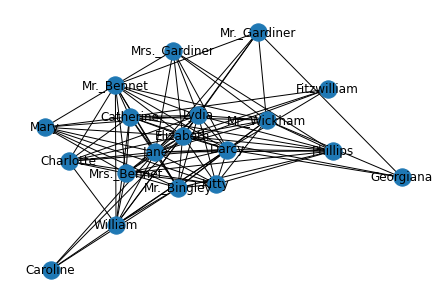

In [30]:
nx.draw(C3, with_labels=True)

In [31]:
list(nx.find_cliques(G))

[['Elizabeth',
  'Jane',
  'Lydia',
  'Kitty',
  'Mr._Wickham',
  'Phillips',
  'Darcy',
  'Mr._Bingley'],
 ['Elizabeth', 'Jane', 'Lydia', 'Kitty', 'Mrs._Bennet', 'Charlotte', 'Darcy'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Kitty',
  'Mrs._Bennet',
  'Mr._Bingley',
  'Phillips',
  'Darcy'],
 ['Elizabeth', 'Jane', 'Lydia', 'Kitty', 'Mrs._Bennet', 'Mr._Bingley', 'Mary'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Mrs._Gardiner',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Catherine',
  'Mr._Bingley',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Catherine',
  'Mr._Bingley',
  'Mrs._Bennet'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Mrs._Gardiner',
  'Darcy',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Catherine',
  'Mr._Wickham',
  'Darcy',
  'Mr._Bingley'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Catherine',
  'Mrs._Bennet',
  'William

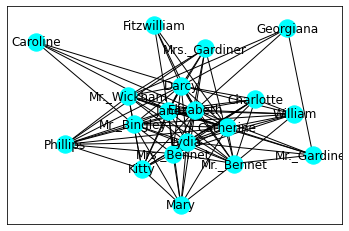

In [32]:
g_core=nx.k_core(G, k=2, core_number=None)
nx.draw_networkx(g_core,node_color='cyan')

In [33]:
k_components = nx.k_components(G)
k_components

{9: [{'Catherine',
   'Charlotte',
   'Darcy',
   'Elizabeth',
   'Jane',
   'Kitty',
   'Lydia',
   'Mr._Bennet',
   'Mr._Bingley',
   'Mr._Wickham',
   'Mrs._Bennet',
   'Phillips',
   'William'}],
 8: [{'Catherine',
   'Charlotte',
   'Darcy',
   'Elizabeth',
   'Jane',
   'Kitty',
   'Lydia',
   'Mary',
   'Mr._Bennet',
   'Mr._Bingley',
   'Mr._Wickham',
   'Mrs._Bennet',
   'Phillips',
   'William'}],
 7: [{'Catherine',
   'Charlotte',
   'Darcy',
   'Elizabeth',
   'Jane',
   'Kitty',
   'Lydia',
   'Mary',
   'Mr._Bennet',
   'Mr._Bingley',
   'Mr._Wickham',
   'Mrs._Bennet',
   'Mrs._Gardiner',
   'Phillips',
   'William'}],
 6: [{'Catherine',
   'Charlotte',
   'Darcy',
   'Elizabeth',
   'Jane',
   'Kitty',
   'Lydia',
   'Mary',
   'Mr._Bennet',
   'Mr._Bingley',
   'Mr._Wickham',
   'Mrs._Bennet',
   'Mrs._Gardiner',
   'Phillips',
   'William'}],
 5: [{'Catherine',
   'Charlotte',
   'Darcy',
   'Elizabeth',
   'Jane',
   'Kitty',
   'Lydia',
   'Mary',
   'Mr._Bennet',
 

In [34]:
print(nx.transitivity(G))

0.7072953736654805


In [35]:
print(nx.clustering(G))

{'Elizabeth': 0.5359477124183006, 'Darcy': 0.5833333333333334, 'Mr._Bennet': 0.717948717948718, 'Mrs._Bennet': 0.8333333333333334, 'Jane': 0.5808823529411765, 'Mary': 0.9285714285714286, 'Kitty': 0.8222222222222222, 'Lydia': 0.6952380952380952, 'Mr._Bingley': 0.7435897435897436, 'Caroline': 1.0, 'Mr._Wickham': 0.696969696969697, 'William': 0.9722222222222222, 'Catherine': 0.7307692307692307, 'Mr._Gardiner': 0.8, 'Mrs._Gardiner': 0.9523809523809523, 'Georgiana': 0.8333333333333334, 'Charlotte': 0.9166666666666666, 'Fitzwilliam': 1.0, 'Phillips': 0.8666666666666667}


In [36]:
print(nx.average_clustering(G))

0.8005303004529011


In [37]:
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Caroline'],
 ['Catherine',
  'Charlotte',
  'Darcy',
  'Elizabeth',
  'Fitzwilliam',
  'Jane',
  'Kitty',
  'Lydia',
  'Mary',
  'Mr._Bennet',
  'Mr._Bingley',
  'Mr._Gardiner',
  'Mr._Wickham',
  'Mrs._Bennet',
  'Mrs._Gardiner',
  'Phillips',
  'William'],
 ['Georgiana']]

In [38]:
part = community.community_louvain.best_partition(G)
print(part)

{'Elizabeth': 0, 'Darcy': 0, 'Mr._Bennet': 2, 'Mrs._Bennet': 2, 'Jane': 0, 'Mary': 2, 'Kitty': 2, 'Lydia': 2, 'Mr._Bingley': 0, 'Caroline': 0, 'Mr._Wickham': 2, 'William': 1, 'Catherine': 1, 'Mr._Gardiner': 2, 'Mrs._Gardiner': 0, 'Georgiana': 0, 'Charlotte': 1, 'Fitzwilliam': 0, 'Phillips': 2}


In [39]:
print(community.modularity(part, G))

0.1018070512199633


In [40]:
induced = community.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 2, 1]
[(0, 0), (0, 2), (0, 1), (2, 2), (2, 1), (1, 1)]


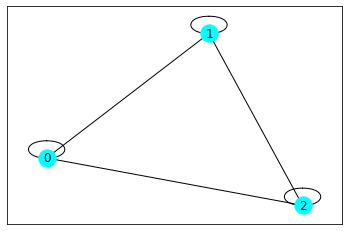

In [41]:
nx.draw_networkx(induced,node_color='cyan')

In [42]:
list(nx.find_cliques(G))  # Search for all maximal cliques in a graph.

[['Elizabeth',
  'Jane',
  'Lydia',
  'Kitty',
  'Mr._Wickham',
  'Phillips',
  'Darcy',
  'Mr._Bingley'],
 ['Elizabeth', 'Jane', 'Lydia', 'Kitty', 'Mrs._Bennet', 'Charlotte', 'Darcy'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Kitty',
  'Mrs._Bennet',
  'Mr._Bingley',
  'Phillips',
  'Darcy'],
 ['Elizabeth', 'Jane', 'Lydia', 'Kitty', 'Mrs._Bennet', 'Mr._Bingley', 'Mary'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Mrs._Gardiner',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Catherine',
  'Mr._Bingley',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Phillips',
  'Darcy',
  'Catherine',
  'Mr._Bingley',
  'Mrs._Bennet'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Mrs._Gardiner',
  'Darcy',
  'Mr._Wickham'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Catherine',
  'Mr._Wickham',
  'Darcy',
  'Mr._Bingley'],
 ['Elizabeth',
  'Jane',
  'Lydia',
  'Mr._Bennet',
  'Catherine',
  'Mrs._Bennet',
  'William

<u> Finding the maximal cliques and treat these as nodes. These nodes are connected if they have common members in the original graph. </u> 

In [43]:
synthetic = nx.make_max_clique_graph(G)  
print(synthetic.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (10, 11),

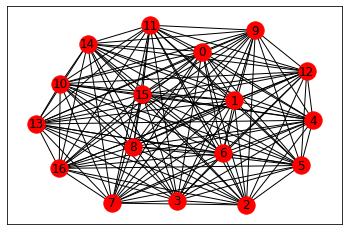

In [44]:
nx.draw_networkx(synthetic,node_color='red')

In [45]:
c = list(k_clique_communities(G, 3))
print(c)

[frozenset({'Lydia', 'Kitty', 'Mr._Wickham', 'Charlotte', 'Fitzwilliam', 'Catherine', 'Mr._Gardiner', 'Caroline', 'William', 'Georgiana', 'Phillips', 'Mary', 'Elizabeth', 'Jane', 'Mrs._Bennet', 'Mrs._Gardiner', 'Mr._Bingley', 'Darcy', 'Mr._Bennet'})]


In [46]:
print(list(c[0]))


['Lydia', 'Kitty', 'Mr._Wickham', 'Charlotte', 'Fitzwilliam', 'Catherine', 'Mr._Gardiner', 'Caroline', 'William', 'Georgiana', 'Phillips', 'Mary', 'Elizabeth', 'Jane', 'Mrs._Bennet', 'Mrs._Gardiner', 'Mr._Bingley', 'Darcy', 'Mr._Bennet']


**(e) Find the degree distribution, average shortest path, size of the largest component. Also create an equivalent generative model to compare against the social graph that you extracted**

In [47]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  19
Edges:  100
Average degree:  5.2631578947368425


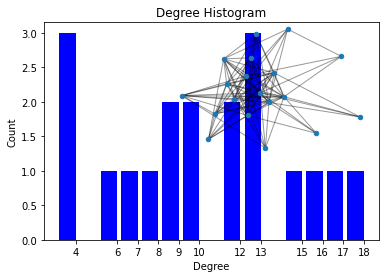

In [48]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
# = list(A)[0]
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

<u> Degree Distribution </u>

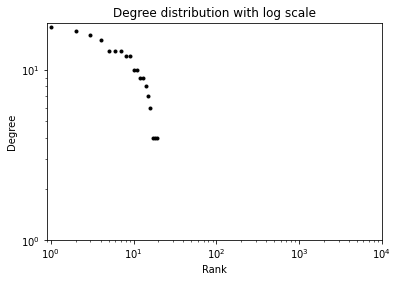

In [49]:
degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

In [50]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Elizabeth': array([-0.01806528,  0.03852234]),
 'Darcy': array([-0.2590539 ,  0.00627044]),
 'Mr._Bennet': array([0.39083706, 0.36041481]),
 'Mrs._Bennet': array([ 0.07159673, -0.13638397]),
 'Jane': array([-0.09951892,  0.2274581 ]),
 'Mary': array([ 0.78266382, -0.19007718]),
 'Kitty': array([ 0.41621369, -0.41804143]),
 'Lydia': array([ 0.31374273, -0.02160701]),
 'Mr._Bingley': array([0.07044983, 0.36938254]),
 'Caroline': array([-0.82372008,  1.        ]),
 'Mr._Wickham': array([ 0.26357683, -0.25258655]),
 'William': array([-0.62452277,  0.31647131]),
 'Catherine': array([-0.13995686, -0.32735659]),
 'Mr._Gardiner': array([0.90993621, 0.34682295]),
 'Mrs._Gardiner': array([-0.09443857,  0.70678395]),
 'Georgiana': array([ 0.32629013, -0.94482544]),
 'Charlotte': array([-0.46640225, -0.19197901]),
 'Fitzwilliam': array([-0.91847255, -0.10338881]),
 'Phillips': array([-0.10115584, -0.78588044])}

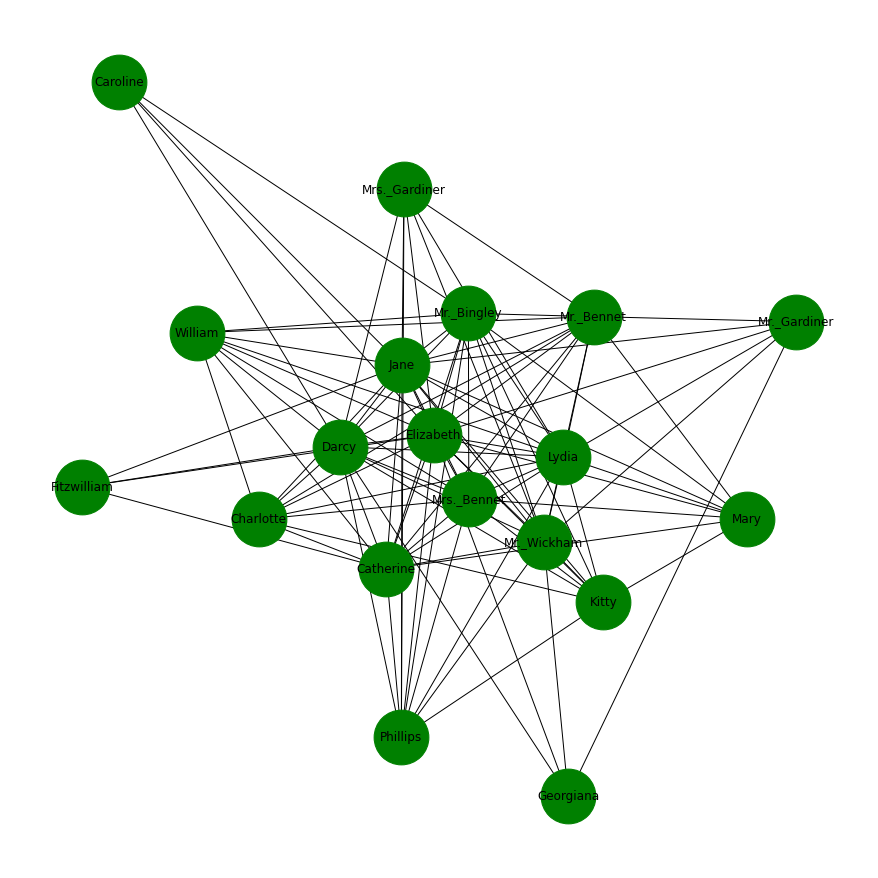

In [51]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='green', with_labels=True)

In [52]:
# Shortest paths are not unique
source= "Mary"
target= "Fitzwilliam"
list(nx.all_shortest_paths(G, source, target))

[['Mary', 'Elizabeth', 'Fitzwilliam'],
 ['Mary', 'Jane', 'Fitzwilliam'],
 ['Mary', 'Catherine', 'Fitzwilliam']]

In [53]:
def plot_paths(G, paths):
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='yellow')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

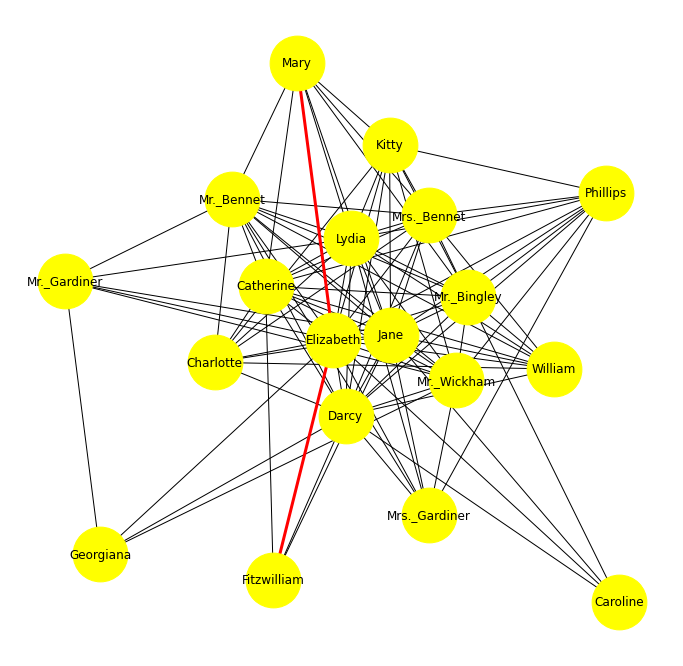

In [54]:
plot_paths(G, [nx.shortest_path(G, source, target)])

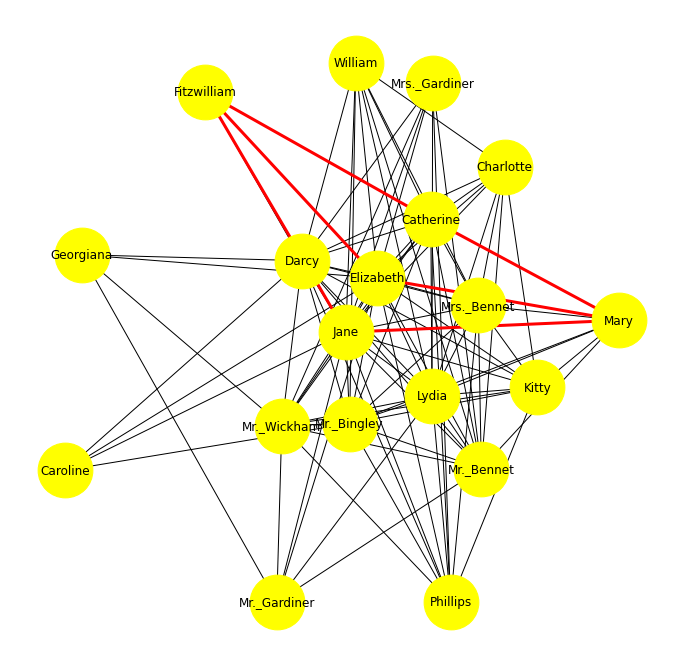

In [55]:
plot_paths(G, nx.all_shortest_paths(G, source, target))

In [56]:
print(nx.average_shortest_path_length(G))

1.4152046783625731


In [57]:
nodes=G.number_of_nodes()
nodes

19

In [58]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Elizabeth  : Degree is  18
Node  Darcy  : Degree is  16
Node  Mr._Bennet  : Degree is  13
Node  Mrs._Bennet  : Degree is  12
Node  Jane  : Degree is  17


4.0

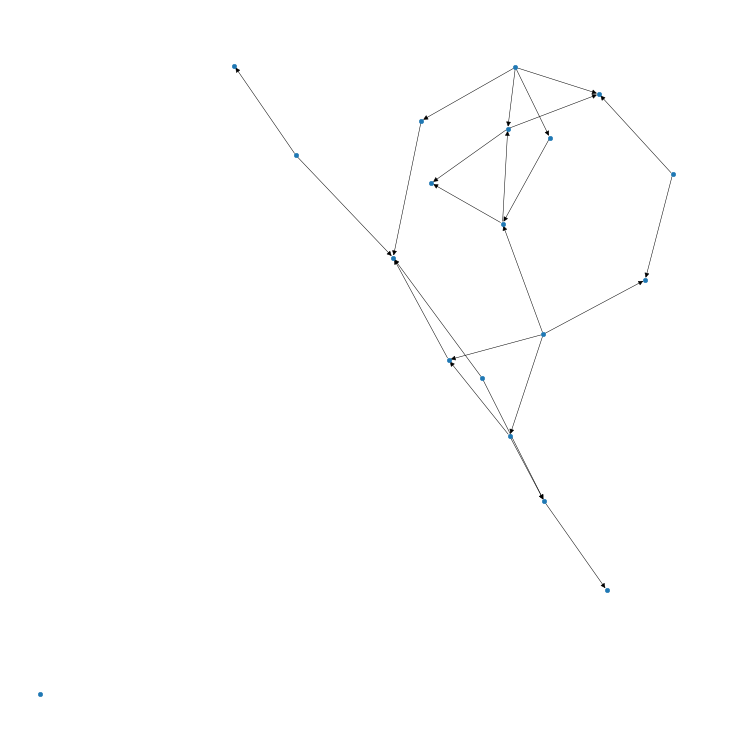

In [59]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

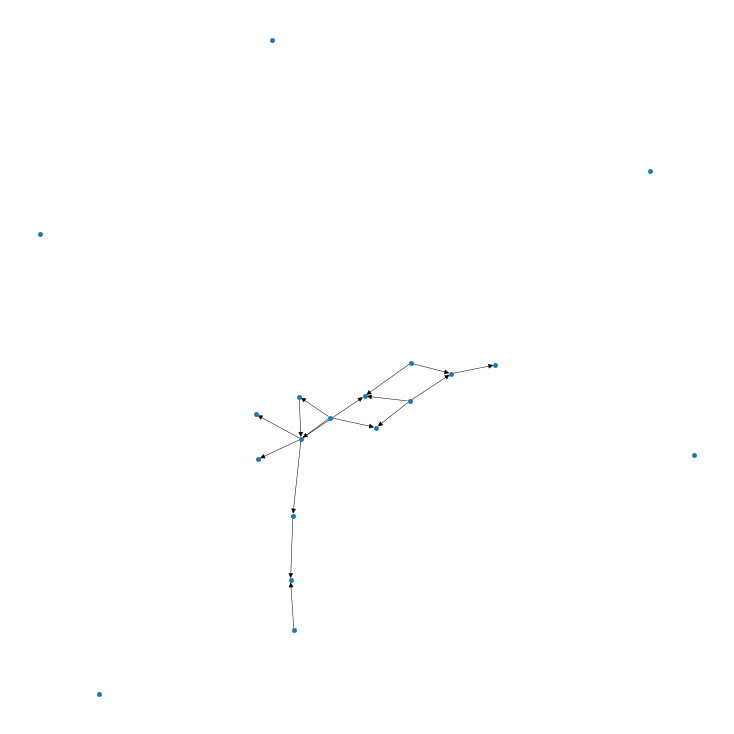

In [60]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

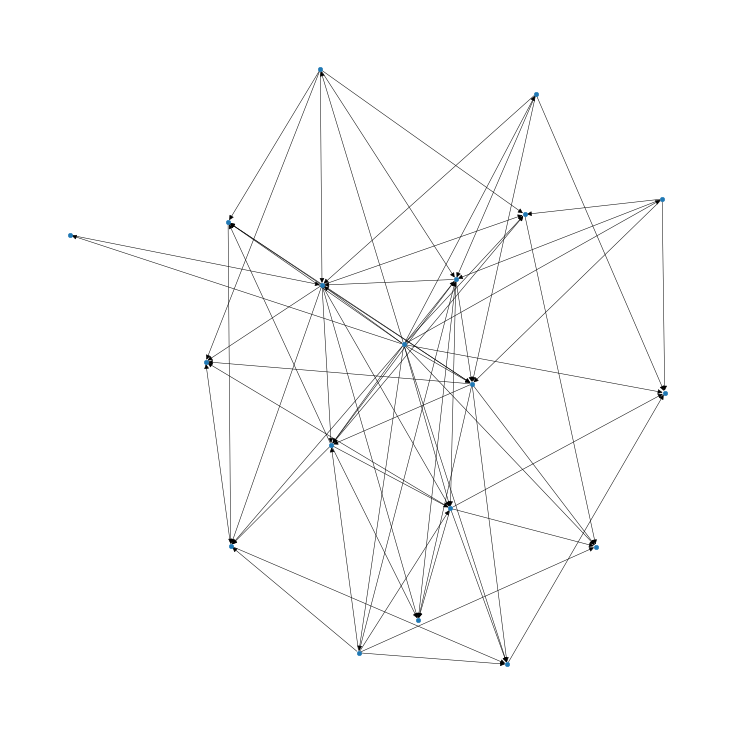

In [61]:
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

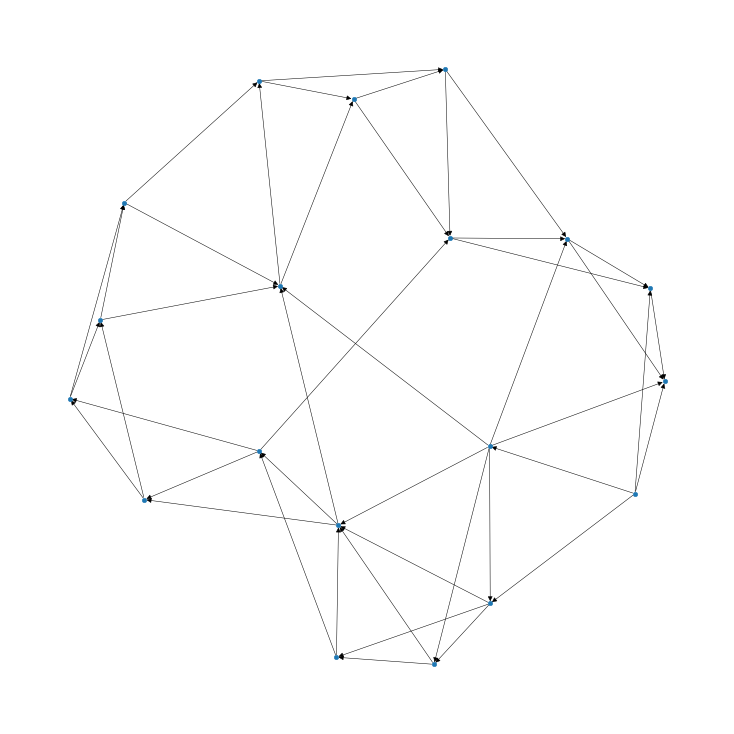

In [62]:
H = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

Ego Network Function:

In [63]:
def plot_ego(ego):
    options = {"node_size": 1200, "node_color": "r"}
    hub_ego = nx.ego_graph(G, ego)
  
    # showing the ego network
    nx.draw(hub_ego, pos, node_color="lavender", 
        node_size = 800, with_labels = True)
  
    nx.draw_networkx_nodes(
      hub_ego, pos, nodelist = [ego], **options)
  
    return plt.show()

**(d) Analysis**

<b> _A short summary:_ <b>

This novel is centred around the rapid <u>relationship between Elizabeth Bennet</u>, <u>the novel’s heroine</u> and the <u>daughter of a country gentleman</u>, and <u>Fitzwilliam Darcy</u>, an <u>aristocratic landowner</u>. 
It is <u>set in rural Englan</u>d at the turn of the 19th century, and it follows the <u>Bennet family</u>, which includes <u>five very different sisters</u>, all of whom their <u>mother</u> is keen to <u>see suitably married</u>. 
The <u>intersections of these sisters with several eligible bachelors</u> drive the action of the novel.
Despite initial friction between them, <u>Elizabeth eventually accepts Darcy’s proposal of marriage</u>.

<b> _The protagonists:_ <b>


As per our analysis, the protagonists include: <b> Elizabeth, Jane, Darcy </b> and <b> Lydia </b>.
This accurately aligns with story from the novel as Elizabeth is the second oldest daughter and the novels main character, Jane is her older sister while Mr. Darcy is her primary love interest. Lydia is her younger sister, who ends up running away with Mr. Wickham towards the end of the novel.

Clustering coefficiants, average shortest path:

Since the <b>average clustering coefficient</b> is <b>very high</b> (0.8) and the <b>average shortest path length</b> (1.415) is <b>very low</b>, this indicates that the story involves a handful of highly involved characters who form a <b>tight knit community</b>.

<b> _Comparision with other generated graphs:_ <b>

The high clustering coefficient of our graph goes hand in hand with the fact that our social network involves a generally tight group of people where they all know each other compared to the generated graphs. The higher average degree of our network also is a proof of the fact that most of these characters interact a lot with each other throughout the story. The <b> average shortest path length is similiar to the generated graphs.</b>


<b> _Communities and cliques:_ <b>

Our analysis proves right as the different <b> cliques obtained align with the different situations </b >in which the characters interact throughout the novel. <br>
For example, one of the cliques found consisted of <b> ['Elizabeth', 'Jane', 'Darcy', 'Caroline', 'Mr._Bingley'] </b>. 
This represents an integral part of the story when Jane visits Caroline at Netherfield (where Caroline, Mr. Bingley, and Mr. Darcy reside), and falls sick. She stays there for a few days, and her sister Elizabeth comes to visit. This is when all these characters become close, and hence we observe this clique formed.

<b> _Ego network:_ <b>

The ego networks of the protagonists (Elizabeth, Jane, Darcy) are shown below and they are extremely dense as these characters have frequent interactions with all the other characters in the novel.

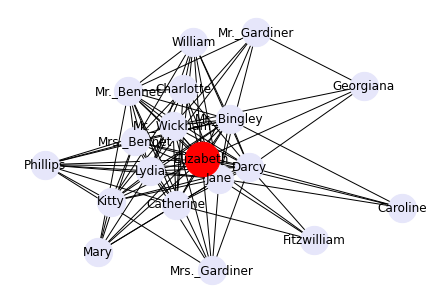

In [64]:
plot_ego("Elizabeth")

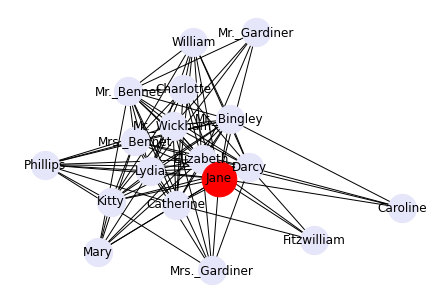

In [65]:
plot_ego("Jane")

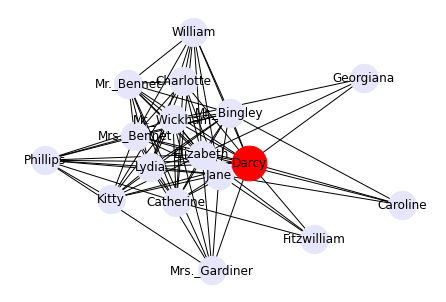

In [66]:
plot_ego("Darcy")

Georgina's ego network is sparse since she does not interact with any characters other than Darcy, Elizabeth, Mr. Wickham and Mr. Gardiner. <br> She plays the role as Mr. Darcy's younger sister (whose character is not as relevant as the others).

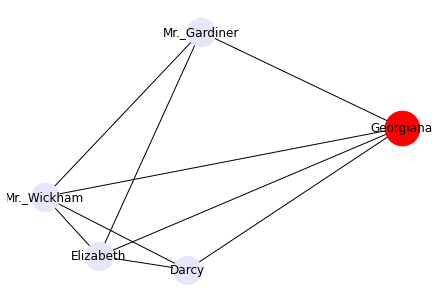

In [68]:
plot_ego("Georgiana")